<a href="https://colab.research.google.com/github/AnjaliBiju/Machine-Learning-Colab/blob/main/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN Theory** is a machine learning algorithm that predicts the label of a new data point by looking at the 'K' closest points from the training data and choosing the most common label among them.

*Training algorithm:*
1. Store all the data

*Prediction algorithm:*
1. Calculate the distance from x to all the points in your data
2. Sort the points in your data by increasing distance from x
3. Predict the majority label of the 'k' closest points

* Choosing a 'k' will affect what class a new point is assigned to

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from google.colab import files
uploaded= files.upload()

Saving Classified Data to Classified Data


In [4]:
df=pd.read_csv('Classified Data',index_col=0)
#index_col=0.. first column of the csv file should be used as the row index

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


<Axes: xlabel='TARGET CLASS', ylabel='count'>

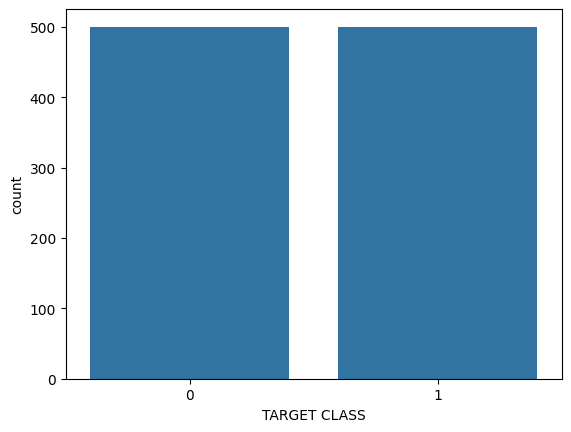

In [6]:
sns.countplot(x='TARGET CLASS',data=df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [10]:
from sklearn.preprocessing import StandardScaler
#StandardScaler is used to make all features have a mean of 0 and a standard deviation of 1
#bcos without standardisation a feature with larger values can dominate distance calculations

In [11]:
scaler=StandardScaler()

In [13]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
#calculates the mean and standard deviation of every class except TARGET CLASS since that is the output class

StandardScaler()

In [17]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
#it applies the standardisation (after calculating) to all the features except the 'target class' since that is the output

In [18]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [19]:
df_features=pd.DataFrame(scaled_features,columns=df.columns[:-1])
#give all the column names of df to df_features except the last column

In [20]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X=df_features
y=df['TARGET CLASS']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier(n_neighbors=1)
#here for each prediction, model will only look at 1 nearest neighbor since n_neighbors=1

In [32]:
knn.fit(X_train,y_train)
#here the model has to learn from data in X and the result stored in y_train

KNeighborsClassifier(n_neighbors=1)

In [33]:
predictions=knn.predict(X_test)
#here the model predicts on new unseen data which we'll be comapred with y_test to see the accuracy

In [34]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_test,predictions))
#[TN FP]
#[FN TP]

[[151   8]
 [ 15 126]]


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



* Here the classification report is pretty good.. with precision being 91% and 94%..even for k=1
* Lets test with other values of k too see whether the precision will increase or decrease

In [42]:
#we are gonna test with every k value from 1 to 40 to see which as the lowest error rate
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

* pred_i  = [1, 0, 1, 1, 0]
* y_test  = [1, 1, 1, 0, 0]
* pred_i != y_test → [False, True, False, True, False]
* np.mean([False, True, False, True, False]) → (0 + 1 + 0 + 1 + 0)/5 = 0.4


In [43]:
error_rate

[np.float64(0.07666666666666666),
 np.float64(0.09),
 np.float64(0.05),
 np.float64(0.07),
 np.float64(0.056666666666666664),
 np.float64(0.05),
 np.float64(0.06666666666666667),
 np.float64(0.06),
 np.float64(0.05),
 np.float64(0.056666666666666664),
 np.float64(0.05333333333333334),
 np.float64(0.04666666666666667),
 np.float64(0.05),
 np.float64(0.056666666666666664),
 np.float64(0.056666666666666664),
 np.float64(0.05),
 np.float64(0.05),
 np.float64(0.04666666666666667),
 np.float64(0.05),
 np.float64(0.05333333333333334),
 np.float64(0.05),
 np.float64(0.05),
 np.float64(0.06333333333333334),
 np.float64(0.056666666666666664),
 np.float64(0.056666666666666664),
 np.float64(0.05),
 np.float64(0.05),
 np.float64(0.04666666666666667),
 np.float64(0.06),
 np.float64(0.05),
 np.float64(0.056666666666666664),
 np.float64(0.04666666666666667),
 np.float64(0.05333333333333334),
 np.float64(0.043333333333333335),
 np.float64(0.04666666666666667),
 np.float64(0.043333333333333335),
 np.flo

Text(0, 0.5, 'Error Rate')

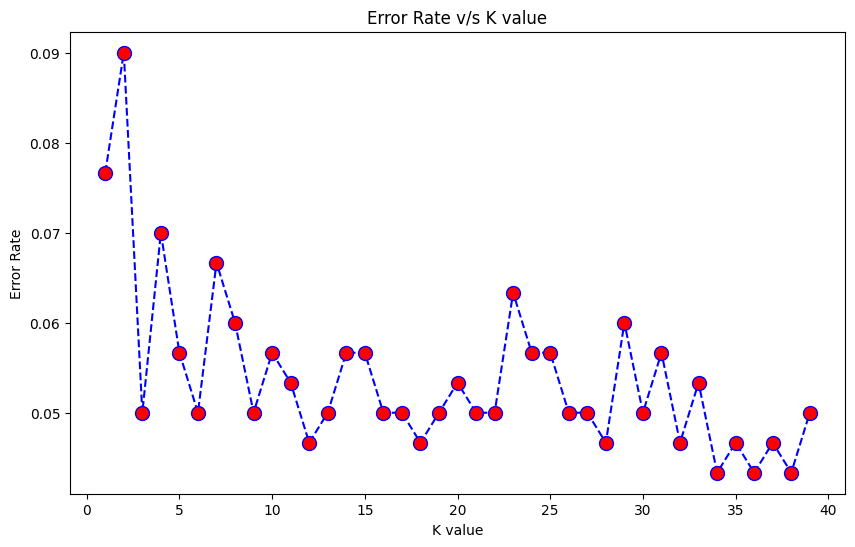

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate v/s K value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [46]:
#ok.. so now we got which k value will give less error rate..let k=34
knn= KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)  #after training the data,do prediction
predictions=knn.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [49]:
print(confusion_matrix(y_test,predictions))
#TN FP
#FN TP

[[153   6]
 [  7 134]]
